# 02_08_solution.ipynb - Diffusion equation

In [1]:
import math

import numpy as np
import matplotlib.pyplot as pp

In [2]:
n = 128

In [3]:
dx = 1/n

In [4]:
xs = np.linspace(0.5*dx, 1-0.5*dx, n)

In [5]:
def initfield():
    array = np.sin(4 * math.pi * xs) + np.sin(9 * math.pi * xs)
    array[0] = array[-1] = 0
    
    return array

In [6]:
field = initfield()

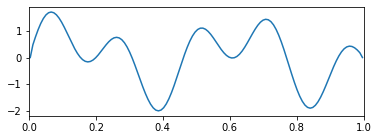

In [7]:
pp.figure(figsize=(6,2))
pp.plot(xs, field)
pp.axis(xmin=0,xmax=1);

#### Solving the equation

In [8]:
def laplacian(array):
    ret = array.copy()        
    ret[1:-1] = (array[2:] - 2*array[1:-1] + array[0:-2]) / dx**2
    
    return ret

In [9]:
def evolve(array, dt):
    ret = array.copy()
    ret[1:-1] = ret[1:-1] + dt * laplacian(array)[1:-1]
    
    return ret

In [10]:
dt = dx**2/2
nsteps = 2000

In [11]:
solution = []

for i in range(nsteps):
    solution.append(field)
    field = evolve(field, dt)
    
solution = np.array(solution)

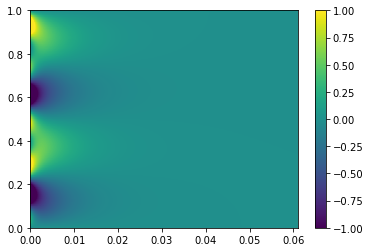

In [12]:
pp.imshow(solution.T, extent=[0,dt*nsteps,0,1], vmin=-1, vmax=1)
pp.colorbar()
pp.axis('auto');

(0.0, 1.0, -2.1713722122936345, 1.878334755137857)

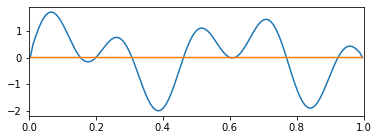

In [13]:
pp.figure(figsize=(6,2))
pp.plot(xs, solution[0,:])
pp.plot(xs, solution[-1,:])
pp.axis(xmin=0, xmax=1)